# ICS 434: DATA SCIENCE FUNDAMENTALS

## Bayesian Parameter Estimation
---

## Announcements

* Homework assignment #2
   * Due: **Wednesday, March 8, 11:59 PM**
   * Refer to the `Homework submission guidelines` announcement in Laulima for preparing and submitting your homework.
     * Note the update on `data` folder and the use of `relative path`
   

* Assignment #1 grades are posted.


## Slide Credits

Most of these slides were taken from Mahdi Belcaid.

In [1]:
#!pip install ipywidgets

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Recall: A/B Testing Example

* In an A/B test, we are interested in comparing two versions of a webpage
  * We would like to determine which one performs better at a task `X`
    
* Ex.: Is Version A (new) or Version B (old) better at signing up new users?

<center><img src="images/ab.jpg" alt="drawing" style="width:600px"></center>


### Bayesian Parameter Estimation

* Consider the generative model for the A/B testing experiment in the previous slide 
* For one person and one webpage prototype, the generative process can be described with the following illustration
  * Suppose that a user is equally likely to sign up or forgo signing up ($p=0.5$)
<center><img src="images/ab_user.jpg"></center>
* Say we are selecting 8 individuals to try Version A, what does the generative process look like?

In [3]:
# @hidden_cell
# @title
# this will be hidden

from IPython.display import HTML, display
from ipywidgets import widgets, Output
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

p=0.5

button = widgets.Button(description = "Run the experiment!")
display(button)
out = Output()
display(out)

green_link = 'images/green.jpg'
red_link = 'images/red.jpg'
black_link = 'images/black.jpg'
arrow_link = 'images/arrow.jpg'
green_guy = "<td><img src=" + green_link + "></td>"
red_guy = "<td><img src=" + red_link + "></td>"
black_guy = "<td><img src=" + black_link + "></td>"
arrow = "<td><img src=" + arrow_link + "></td>"


def on_button_clicked(b):
    number_guys = 0
    test = st.bernoulli.rvs(p, size=1)
    guys = ""
    for item in test:
      if item == 1:
        guys = guys + green_guy
      else:
        guys = guys + red_guy
      number_guys += item
    
    out.clear_output()
    with out:
        display(HTML("<table><tr><td>" + black_guy + "</td><td>" + arrow 
                     + "</td><td>" + guys + "</td></tr></table>"))


button.on_click(on_button_clicked)

Button(description='Run the experiment!', style=ButtonStyle())

Output()

In [4]:
# @hidden_cell
# @title
# this will be hidden
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from ipywidgets import widgets, Output
from IPython.display import HTML, display

button = widgets.Button(description = "Run the experiment!")
display(button)
out = Output()
display(out)

dist_values=[0]*9

green_link = 'images/green.jpg'
red_link = 'images/red.jpg'
green_guy = "<td><img src=" + green_link + "></td>"
red_guy = "<td><img src=" + red_link + "></td>"

def on_button_clicked(b):
    p = 0.5
    test = st.bernoulli.rvs(p, size=8)
    guys = ""
    number_guys = 0
    for item in test:
      if item == 1:
        guys = guys + green_guy
      else:
        guys = guys + red_guy
      number_guys += item
    
    out.clear_output()
    dist_values[number_guys] += 1
    fig = plt.figure(figsize=(14, 5))
    plt.style.use('seaborn-v0_8-darkgrid')
    
    x = np.arange(0, 9)
    ns = [8]
    ps = [p]
    for n, p in zip(ns, ps):
        plt.bar(x, dist_values)
    plt.bar(x[number_guys], dist_values[number_guys], color='green')
    plt.xlabel('number of sign ups', fontsize=14)
    plt.ylabel('counts', fontsize=14)
    plt.xticks(range(0, 9))
    with out:
        display(HTML("<table><tr>" + guys + "</tr></table>"))
        plt.show()
#plt.yticks([]);
#plt.legend(loc=1)


button.on_click(on_button_clicked)

Button(description='Run the experiment!', style=ButtonStyle())

Output()

### The Long Run Distribution

* If one repeats the experiment many times, the graph will represent the binomial distribution

  *  The distribution is parameterized by $n=8$ and $p=0.5$

<img src="images/longrun.png">

### Observations

* We don't know the signup rates $p_A$ and $p_B$ for Version **A** and **B** a priori 
* Clearly, we can use the maximum likelihood (ML) to estimate the parameters
* However: 
  * The sample is small and random events can greatly skew estimation
  * Confidence interval tells us where the interval may be with 95% confidence
    * What we are often interested in is the probability of individual values

  * There is no way to encode our belief about the parameter
    * Say we know a parameter should be ~ 0.9 because other research showed that
    * How can we incorporate that in esimating the parameter? 

* Our approach needs to take that into consideration

### Observations

* We don't know the signup rates $p_A$ and $p_B$ for Version **A** and **B** a priori 
* Clearly, we can use the maximum likelihood (ML) to estimate the parameters
* However: 
  * The sample is small and random events can greatly skew estimation
  * Confidence interval tells us where the values may be with 95% confidence
    * What we are often interested in is the probability of individual values

  * There is no way to encode our belief about the parameter
    * Say we know a parameter should be ~ 0.9 because other research showed that
    * How can we incorporate that in esimating the parameter? 

In [5]:
# Suppose outcomes are 
outcomes = [True] * 5 + [False] * 3
outcomes

[True, True, True, True, True, False, False, False]

In [6]:
bootstrap = np.random.choice(outcomes, size=8, replace=True)
bootstrap_proportion = sum(bootstrap)/len(bootstrap)
bootstrap_proportion

0.75

In [7]:
bootstrap_proportions = []
for _ in range(10_000):
    bootstrap = np.random.choice(outcomes, size=8, replace=True)
    bootstrap_proportion = sum(bootstrap)/len(bootstrap)
    bootstrap_proportions.append(bootstrap_proportion)
np.percentile(bootstrap_proportions, (2.5, 97.5))

array([0.25 , 0.875])

In [8]:
bootstrap = np.random.choice([True, False], size=8, replace=True)
bootstrap_proportion = sum(bootstrap)/len(bootstrap)
print(bootstrap)
bootstrap_proportion

[ True  True False  True False False False  True]


0.5

In [9]:
bootstrap_proportions = []
for _ in range(10000):
    bootstrap = np.random.choice([True, False], size=8, replace=True)
    bootstrap_proportion = sum(bootstrap)/len(bootstrap)
    bootstrap_proportions.append(bootstrap_proportion)
np.percentile(bootstrap_proportions, (2.5, 97.5))

array([0.125, 0.875])

### Running the Simulation Backwards

* Rather than generate random outcomes of the experiment, we record random parameters that could have yielded the observed results

* Which parameters could have generated 5 signups in 8 trials?
    * Recall that $p$ is continuous probability between 0 and 1


### Bayesian Inference Using Rejection Sampling 


* For simplicity, we will only consider Version A

*  How can we determine the most likely value of parameter $p_A$ for Version A? 

* For that we will use a simple algorithm for Bayesian Inference called *rejection sampling*  
 * We simulate parameters and only retain those that agree with our data

### Rejection Sampling 

1.  Sample a parameter value from the set of possible values of $p_A$
  * This is called a prior and represents our prior belief on $p_A$
  * In our example, we believe that $p_A$ is any possible value in $[0, 1]$ conitnuum
   
2.  Generate an outcome, given that parameter value (in our example, run the test that is described by Binomial distribution with parameter $p_A$ and number of people $8$)

3.  * If the generated outcome is the observed data, record the value of the parameter $p_A$ as a possible value that can generate the observed results
    * If the generated outcome is not the observed data, ignore (or reject) the value of the parameter $p_A$
4.  Repeat the procedure many times

### Approximate Bayes Using Rejection Sampling -- Cont'd

<img src="images/rejection.jpg" width="1200">


### Exploring the Distribution of the Parameter $p$

* What does the distribution of $p_A$ look like?

  * This ditribution represents the values that most likely generate the observed data
  
  * I.e., what  we believe, based on observing the data, the value of $p_A$ could have been
  
* Our prior belief was that  $p_A$ is any value between $0$ and $1$

  * Results show that  some values of $p_A$ occur with more probability than other values
  * We could have encoded our belief in a way that gives us some values more often than others
 
* The resulting distribution is called the posterior distribution of the parameter $p_A$

In [10]:
# import packages
import numpy as np
import matplotlib.pyplot as plt

# Version A
n_A = 8        # number of people Version A was tested on
obs_A = 5      # observed number of signups for Version A
p_A_recorded = []

num_of_recorded_vals = 100_000

for _ in range(num_of_recorded_vals):
  # Sample a parameter value p_A
  p_A = np.random.uniform(0, 1)

  # For the p_A, generate an outcome from the Binomal distribution 
  v_A = np.random.binomial(n_A, p_A)
    
  # Compare generated outcomes to the observed data
  if v_A == obs_A:
    p_A_recorded.append(p_A)

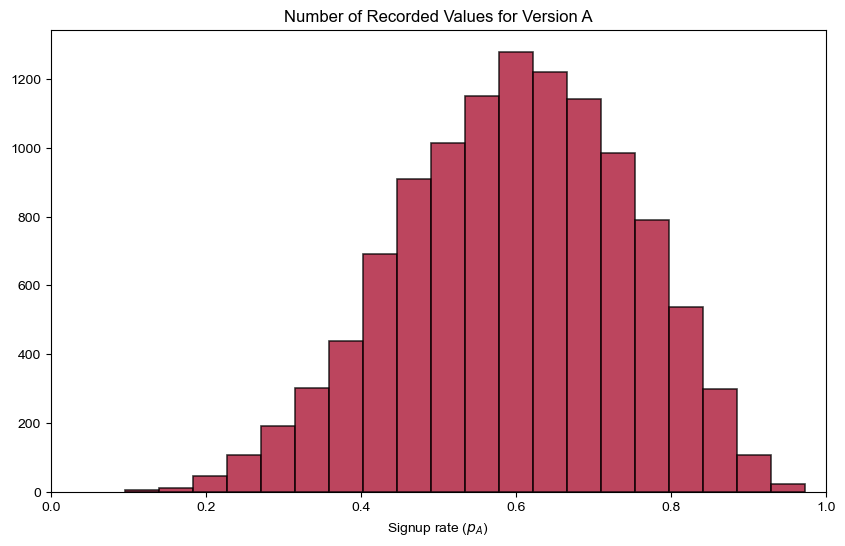

In [11]:
fig = plt.figure(figsize=(10, 6)) 

plt.hist(p_A_recorded, bins=20, alpha=0.75, color="#A60628", edgecolor='black', linewidth=1.2)

plt.xlim(0, 1)
plt.xlabel("Signup rate ($p_A$)")
plt.title("Number of Recorded Values for Version A")
plt.style.use(["seaborn-v0_8-darkgrid"])

### Analyzing the Simulation Results

* Histograms shows the probability of $p_A$ to be highest around 0.625
 * This agrees with the likelihood
 * This shows that the value could also be, with non-negligible probabilities, in other values
 
* In this case, this does not add much to the likelihood

* Imagine, however, that we have another dataset of signups for version A 
  * Out of 9 users tested, 6 signed up for version A

### Updating Our Beliefs

* We have already done some work with $p_A$ which led to generate a posterior of $p_A$
* Rather than sample $p_A$ uniformly from $[0, 1]$, we can sample it from the posterior 
  * In this new round the posterior becomes a prior
* We can sample from the histogram which represents the posterior

In [12]:
np.random.choice(p_A_recorded)

0.5247145618166079

In [13]:
# import packages
import numpy as np
import matplotlib.pyplot as plt

# Version A
n_A = 9        # number of people Version A was tested on
obs_A = 6      # observed number of signups for Version A
p_A_recorded_experiment_2 = []

num_of_recorded_vals = 100_000

for _ in range(num_of_recorded_vals):
  # Sample a parameter value p_A from the posterior 
  p_A = np.random.choice(p_A_recorded)

  # For the p_A, generate an outcome from the Binomal distribution 
  v_A = np.random.binomial(n_A, p_A)
    
  # Compare generated outcomes to the observed data
  if v_A == obs_A:
    p_A_recorded_experiment_2.append(p_A)

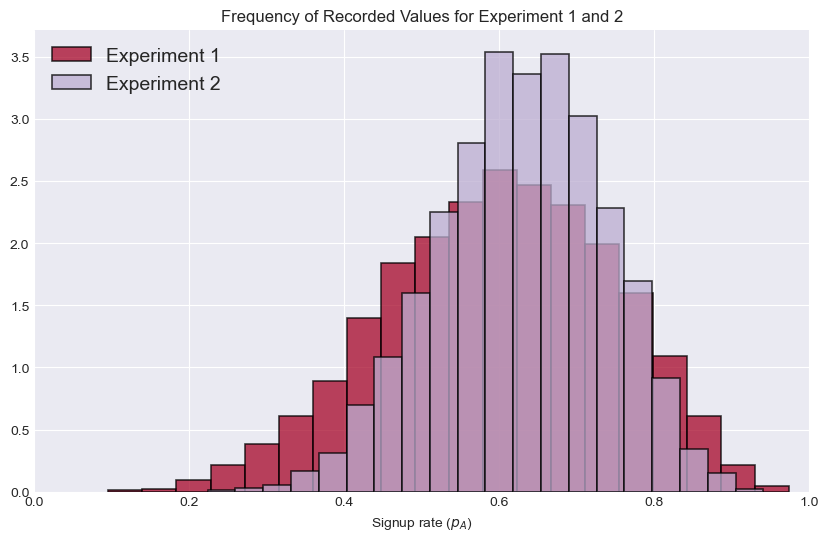

In [14]:
fig = plt.figure(figsize=(10, 6)) 

plt.hist(p_A_recorded, bins=20, density=True, alpha=0.75, 
         label="Experiment 1", color="#A60628", edgecolor='black', linewidth=1.2,)
plt.hist(p_A_recorded_experiment_2, bins=20, density=True, alpha=0.75, 
         label="Experiment 2", color="#bcadd1", edgecolor='black', linewidth=1.2)

plt.xlim(0, 1)
plt.xlabel("Signup rate ($p_A$)")
plt.title("Frequency of Recorded Values for Experiment 1 and 2")
plt.legend(loc='upper left', fontsize=14)
plt.style.use(["seaborn-v0_8-darkgrid"])

In [15]:
# import packages
import numpy as np
import matplotlib.pyplot as plt

# Version A
n_A = 8        # number of people Version A was tested on
obs_A = 6      # observed number of signups for Version A
p_A_recorded_experiment_3 = []

num_of_recorded_vals = 100_000

for _ in range(num_of_recorded_vals):
  # Sample a parameter value p_A from the posterior 
  p_A = np.random.choice(p_A_recorded_experiment_2)

  # For the p_A, generate an outcome from the Binomal distribution 
  v_A = np.random.binomial(n_A, p_A)
    
  # Compare generated outcomes to the observed data
  if v_A == obs_A:
    p_A_recorded_experiment_3.append(p_A)

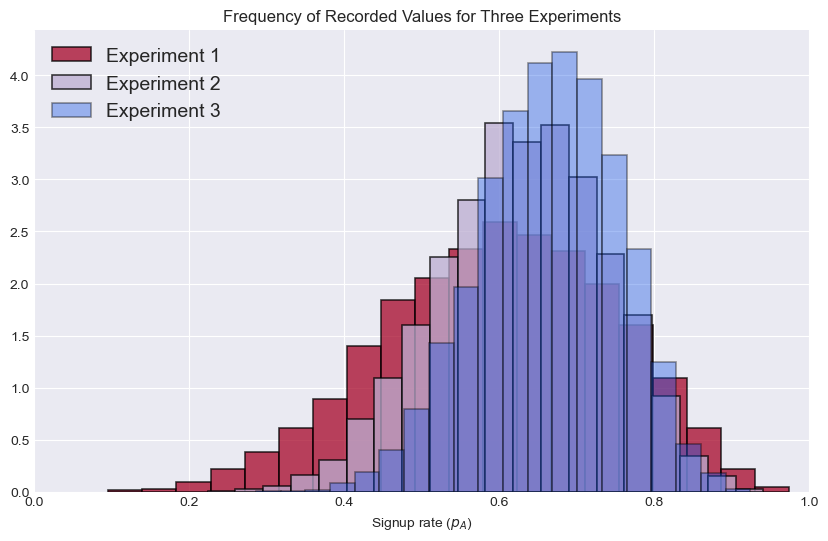

In [16]:
fig = plt.figure(figsize=(10, 6)) 

plt.hist(p_A_recorded, bins=20, density=True, alpha=0.75, label="Experiment 1", color="#a60628", edgecolor='black', linewidth=1.2,)
plt.hist(p_A_recorded_experiment_2, bins=20, density=True, alpha=0.75, 
         label="Experiment 2", color="#bcadd1", edgecolor='black', linewidth=1.2)
plt.hist(p_A_recorded_experiment_3, bins=20, density=True, alpha=0.4, 
         label="Experiment 3", color="#1f5ae6", edgecolor='black', linewidth=1.2)

plt.xlim(0, 1)
plt.xlabel("Signup rate ($p_A$)")
plt.title("Frequency of Recorded Values for Three Experiments")
plt.legend(loc='upper left', fontsize=14);
plt.style.use(["seaborn-v0_8-darkgrid"])

### **Bayesian Inference** for Parameter Estimation
---

* Bayesian inference allows us to use probability theory to assign probabilities to *parameters*

  * Allows for encoding beliefs in a way that is probabilistic
  
  * Allows for incorporating new data in a way that leverages prior discoveries